In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 讀取tensorflow

In [2]:
import tensorflow as tf

## 1 讀入MNIST 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

## 2 欣賞數據資料

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
n=3879

In [8]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  14,  77, 145, 198, 254, 255, 254, 209,  59,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

2

## 把矩陣當成圖形做出來

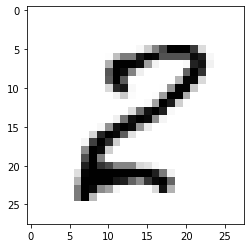

In [10]:
plt.imshow(x_train[n],cmap="Greys")

# 3 資料整理

In [11]:
np.array([3,45,35,75])/100

array([0.03, 0.45, 0.35, 0.75])

In [12]:
x_train=x_train/255
x_test=x_test/255

# 拉平

In [13]:
28*28

784

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train= x_train.reshape(60000,784)

In [16]:
x_test=x_test.reshape(10000,784)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_train=to_categorical(y_train,10)

In [19]:
y_test=to_categorical(y_test,10)

In [20]:
y_train[8923]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 打造神經網路

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [22]:
mymodel= Sequential()

In [23]:
mymodel.add(Dense(87,input_dim=784,activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [24]:
mymodel.add(Dense(87,activation="relu"))

In [25]:
mymodel.add(Dense(10,activation="softmax"))

### 4組裝神經網路

In [26]:
mymodel.compile(loss="mse",optimizer=SGD(lr=0.675),metrics=["accuracy"])

In [27]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [28]:
784*87+87

68295

## 5 訓練

In [29]:
mymodel.fit(x_train,y_train,batch_size=100,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0335 - acc: 0.7786
Epoch 2/20
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0134 - acc: 0.9145
Epoch 3/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0110 - acc: 0.9297
Epoch 4/20
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0095 - acc: 0.9396
Epoch 5/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0085 - acc: 0.9466
Epoch 6/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0077 - acc: 0.9522
Epoch 7/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0070 - acc: 0.9562
Epoch 8/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0065 - acc: 0.9596
Epoch 9/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0060 - acc: 0.9625
Epoch 10/20
60000/60000 [==============================] -

## 6 訓練成果

In [36]:
result =mymodel.predict_classes(x_test)

神經網路預測是: 1


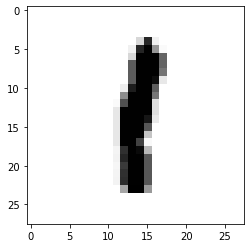

In [38]:
n=39

print("神經網路預測是:",result[n])
plt.imshow(x_test[n].reshape(28,28),cmap="Greys")